In [1]:
import pandas as pd

In [16]:
df = pd.read_csv("D:\Data-science\exchange_rate.csv")
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [17]:
df['date'] = pd.to_datetime(df['date'], errors='coerce',dayfirst=True)
df

,date,Ex_rate
0,1990-01-01,0.785500
1,1990-01-02,0.781800
2,1990-01-03,0.786700
3,1990-01-04,0.786000
4,1990-01-05,0.784900
...,...,...
7583,2010-10-06,0.718494
7584,2010-10-07,0.721839
7585,2010-10-08,0.723197
7586,2010-10-09,0.720825


In [18]:
df.set_index('date', inplace=True)
df

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


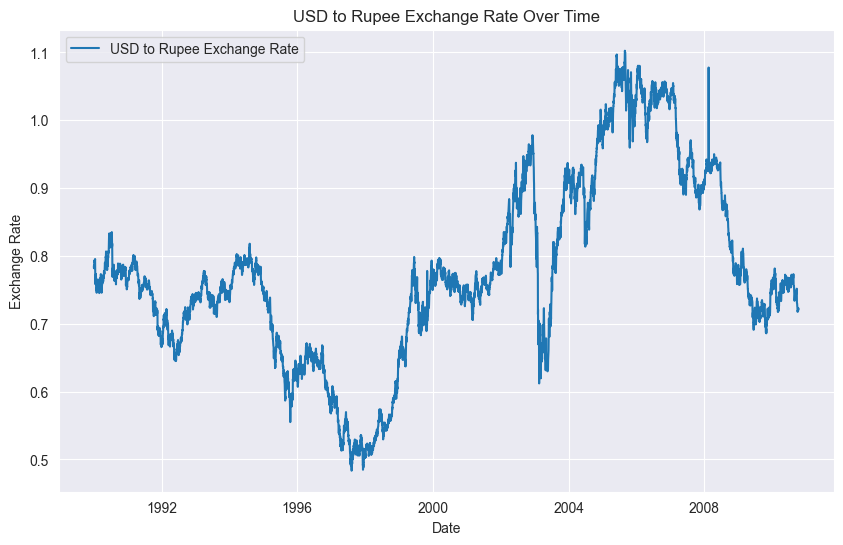

In [19]:
import matplotlib.pyplot as plt

# Plot the exchange rate over time
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='USD to Rupee Exchange Rate')
plt.title('USD to Rupee Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [20]:
print(df.isnull().sum())


Ex_rate    0
dtype: int64


In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


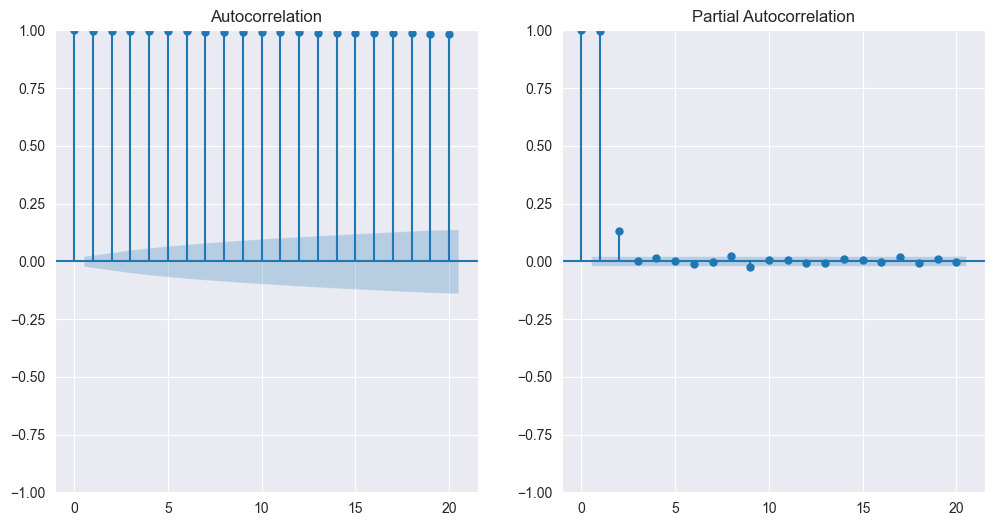

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Ex_rate'], ax=plt.gca(), lags=20)
plt.subplot(122)
plot_pacf(df['Ex_rate'], ax=plt.gca(), lags=20)
plt.show()

In [24]:
import statsmodels.api as sm

model = sm.tsa.ARIMA(df['Ex_rate'], order=(1,1,1))
fitted_model = model.fit()

# Display the summary of the ARIMA model
print(fitted_model.summary())

C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 10 Apr 2025   AIC                         -56102.322
Time:                        17:14:17   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

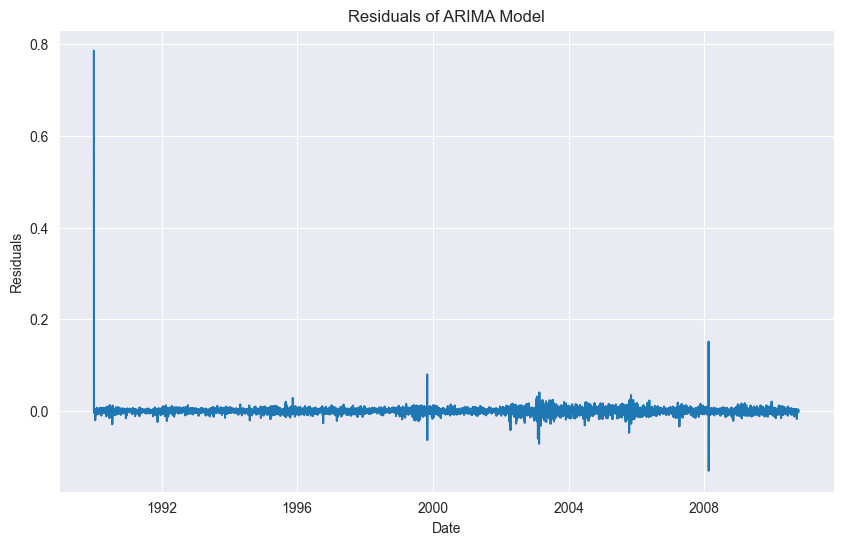

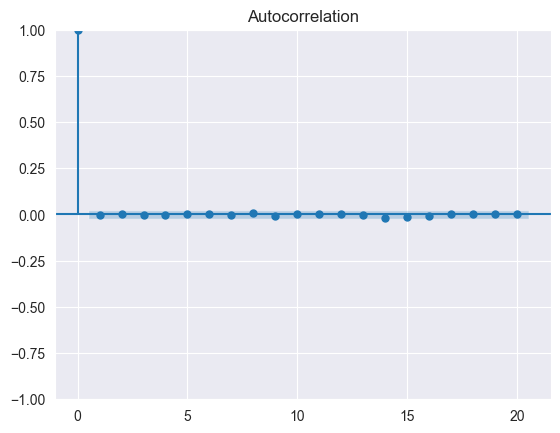

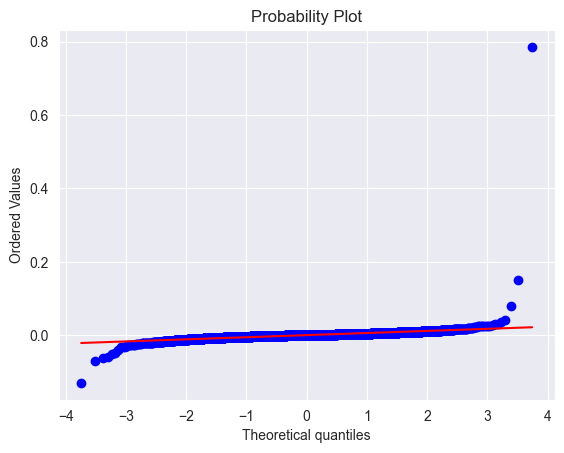

In [26]:
residuals = fitted_model.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()
# Plot ACF of residuals to check for autocorrelation
plot_acf(residuals, lags=20)
plt.show()

# Check if residuals are normally distributed
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

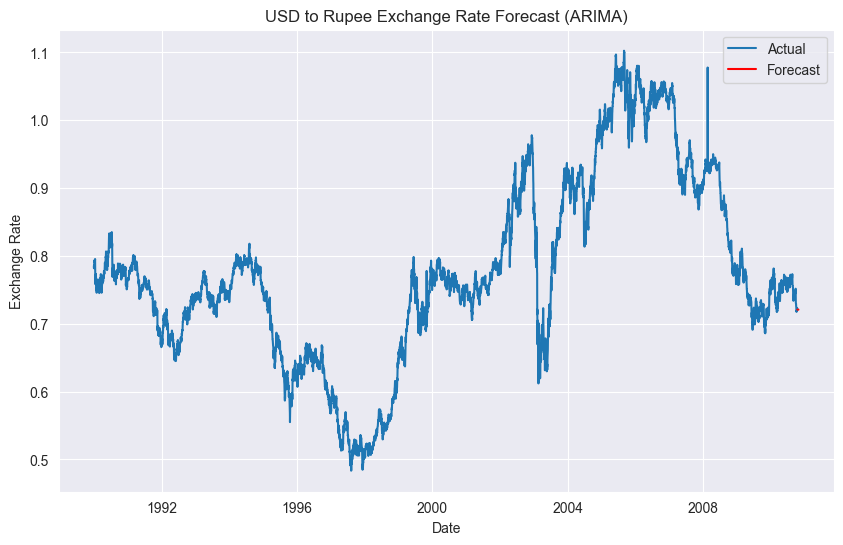

In [28]:
# Forecast the next 12 months (assuming monthly data)
forecast_steps = 12
forecast = fitted_model.forecast(steps=forecast_steps)

# Plot the forecast against actual values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label='Forecast', color='red')
plt.title('USD to Rupee Exchange Rate Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


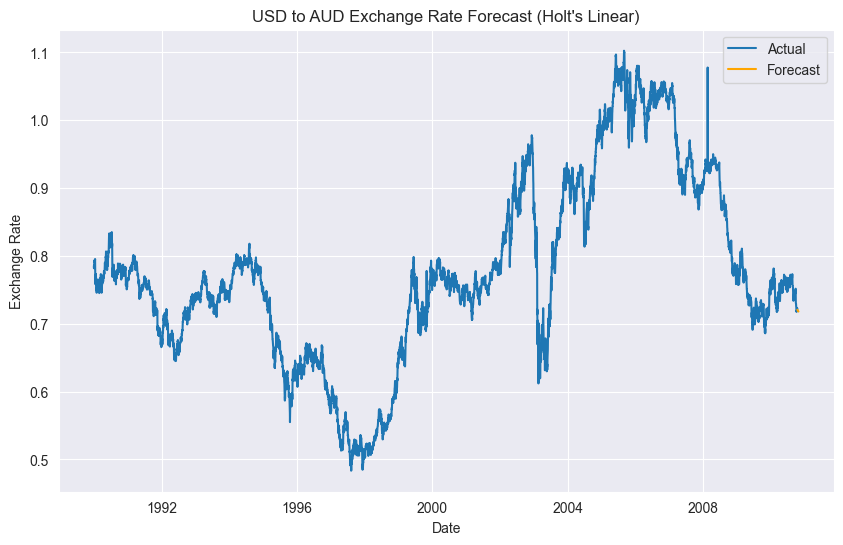

In [29]:
from statsmodels.tsa.holtwinters import Holt

# Fit Holt's Linear Trend Model
holt_model = Holt(df['Ex_rate']).fit()

# Forecast the next 12 months
holt_forecast = holt_model.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:], holt_forecast, label='Forecast', color='orange')
plt.title('USD to AUD Exchange Rate Forecast (Holt\'s Linear)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [30]:
best_aic = float('inf')
best_params = None

# Grid search for alpha values
for alpha in [0.1, 0.2, 0.3, 0.4, 0.5]:
    model = Holt(df['Ex_rate'], exponential=False).fit(smoothing_level=alpha)
    aic = model.aic
    if aic < best_aic:
        best_aic = aic
        best_params = alpha

print(f"Best alpha value: {best_params} with AIC: {best_aic}")

C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.p

Best alpha value: 0.5 with AIC: -76311.3915694807


C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


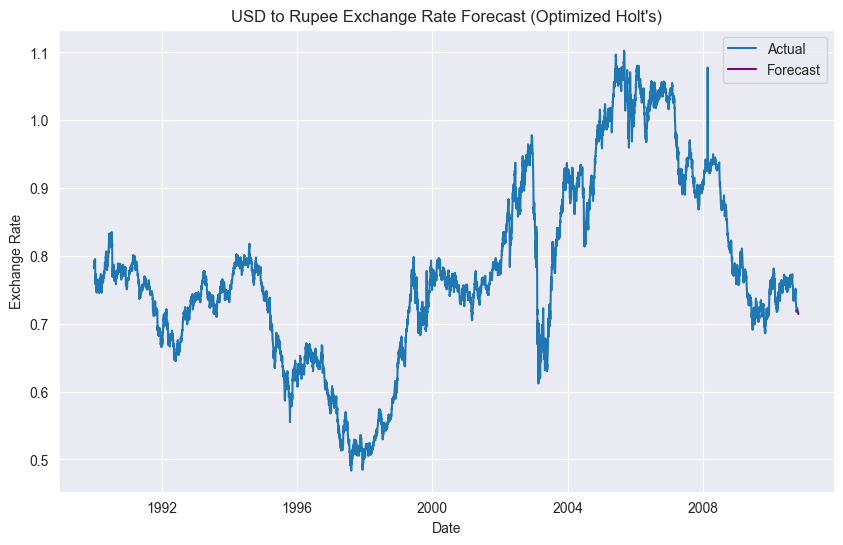

In [31]:
optimal_model = Holt(df['Ex_rate'], exponential=False).fit(smoothing_level=best_params)

# Forecasting the next 12 months
optimal_forecast = optimal_model.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:], optimal_forecast, label='Forecast', color='purple')
plt.title('USD to Rupee Exchange Rate Forecast (Optimized Holt\'s)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Compute error metrics for ARIMA model
arima_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], forecast)
arima_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], forecast))
arima_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - forecast) / df['Ex_rate'][-forecast_steps:])) * 100

# Compute error metrics for Holt's model
holt_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], holt_forecast)
holt_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], holt_forecast))
holt_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - holt_forecast) / df['Ex_rate'][-forecast_steps:])) * 100

# Print the results
print(f"ARIMA - MAE: {arima_mae}, RMSE: {arima_rmse}, MAPE: {arima_mape}%")
print(f"Holt's Linear - MAE: {holt_mae}, RMSE: {holt_rmse}, MAPE: {holt_mape}%")


ARIMA - MAE: 0.001664492434046964, RMSE: 0.002000358073456273, MAPE: nan%
Holt's Linear - MAE: 0.00195418415541194, RMSE: 0.0024389709427153254, MAPE: nan%
